# Perceptron in Python

To show the perceptron model in action we will attempt to classify samples from the Iris dataset. This dataset is very common in machine learning for learning purposes. It contains samples of different flowers with features like petal length, width, and sepal length, width. Here we will extract two different types of flowers and classify them based on petal length and sepal length. 

In [1]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.
    
    Parameters
    ----------
    eta: float
        Learning rate (0.0, 1.0)
    n_iter: int
        Passes over the training set
    
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in every epoch.
        
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit Training data
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of training samples
                                and n_features is the number of features
        y : {array-like}, shape = [n_samples]
            Target values
            
        Returns 
        -------
        self : object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi # update weight for this feature
                self.w_[0] += update # update the threshold 
                errors += int(update != 0.0) # turn boolean into int, incriment if yes
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calcualte net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def predict(self, X):
        """Return class label after unit step"""
        # if net_input of X is greater than 0 return 1, else -1
        return np.where(self.net_input(X) >= 0.0, 1, -1) 
            

## Classify Iris Dataset
### Get the Dataset

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Format the data
get the first 100 class labels, 50 Iris-Setosa and 50 Iris-Versicolor. Convert the labels into integer identifiers, 1 for Versicolor and -1 for Setosa.

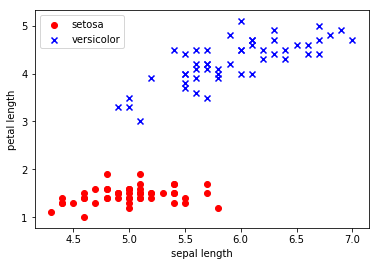

In [3]:
import matplotlib.pyplot as plt
y = df.iloc[0:100, 4]

y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0,2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

### Train the perceptron

Train the perceptron over the iris dataset 10 times with a learning rate of 0.1. 
An **epoch** is one training cycle, the chart below shows the number of misclassifications for every epoch.

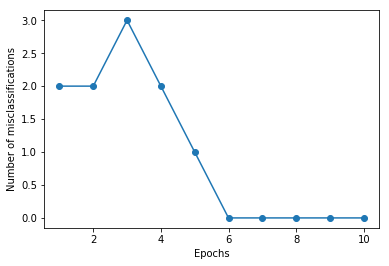

In [4]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v') 
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.6, c=cmap(idx), marker=markers[idx], label=cl)

### Show the results

The perceptron has successfully learned from the data we supplied and can predict with 100% accuracy over the training data. This is possible because the classes are linearly separable.

From the graph below we can see that the perceptron we trained will predict anything in the blue region as being a versicolor, thus anything in the red region will not be a versicolor. Since we trained to classify two class labels there is a binary option, yes it is a versicolor, or not it is not (vertosa). If we wished to predict a multitude of class labels and still use the perceptron model we would need a single perceptron for each class label. The perceptron for each respective class would activate only if the inputs were indicative of that class. This creates a net of perceptrons,... perceptrons model a neuron,... neural network.

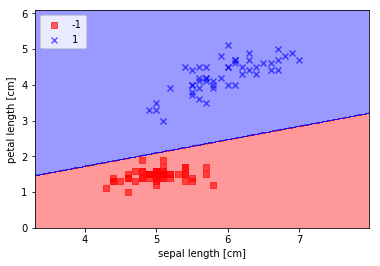

In [6]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()